In [1]:
from os.path import join, isdir
from os import sep, getcwd, chdir
from ExperimentSettings import EXPERIMENT_SETTINGS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import networkx as nx
from os.path import join
import json
import numpy as np
import pandas as pd

In [3]:
import matplotlib
matplotlib.rcParams['legend.loc'] = 'lower right'
matplotlib.rcParams['legend.fontsize'] = 9
pd.options.display.float_format = "{:,.2f}".format


In [3]:
def _get_networks_norm_anom_comm_sizes(p, m, group_size, network, anom_comm_names):
    partition_map_fp = join('Experiment',f'ErdosRenyi_p{p:.2f}_k[1,1]_m{m:.2f}','Data','PartitionMaps', group_size, f'partitions_map_{network}_test.json')
    with open(partition_map_fp, 'r') as file:
        partition_map = json.load(file)
    normal_comm_sizes = []
    anomalous_comm_sizes = []
    
    for comm in [c for c in partition_map.keys() if c not in anom_comm_names]:
        normal_comm_sizes.append(len(partition_map[comm]))
        
    for comm in anom_comm_names:
        anomalous_comm_sizes.append(len(partition_map[comm]))

    return normal_comm_sizes, anomalous_comm_sizes

In [4]:
def _get_p_m_size_groups_networks_norm_anom_comm_sizes(p, m, group_size, anom_comm_names):
    normal_mean_mean_avg_degree, anomalous_mean_mean_avg_degree = [], []

    for network in range(1, 11):
        normal_comm_sizes, anomalous_comm_sizes = _get_networks_norm_anom_comm_sizes(p, m, group_size, network, anom_comm_names)
        normal_mean_mean_avg_degree.append(normal_comm_sizes)
        anomalous_mean_mean_avg_degree.append(anomalous_comm_sizes)

    return normal_mean_mean_avg_degree, anomalous_mean_mean_avg_degree

In [16]:
p = 0.4
m = 0.8
group_size = 'mean'
anom_comm_names = [f'AnomComm000000000{str(i+1).zfill(2)}' for i in range(0, 10)]

In [17]:
normal_mean_mean_avg_degree, anomalous_mean_mean_avg_degree = _get_p_m_size_groups_networks_norm_anom_comm_sizes(p, m, group_size, anom_comm_names)

In [22]:
np.mean([np.quantile(s, 0.1) for s in normal_mean_mean_avg_degree])

54.58

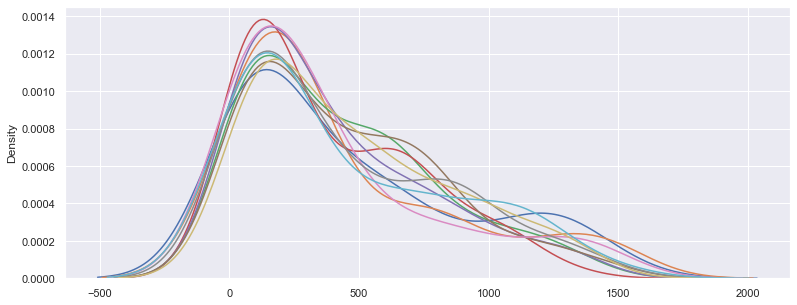

In [15]:
sns.set(rc={'figure.figsize':(13,5)})
[sns.distplot(s, hist=False) for s in normal_mean_mean_avg_degree];

In [10]:
np.mean([np.min(s) for s in anomalous_mean_mean_avg_degree])

32.3

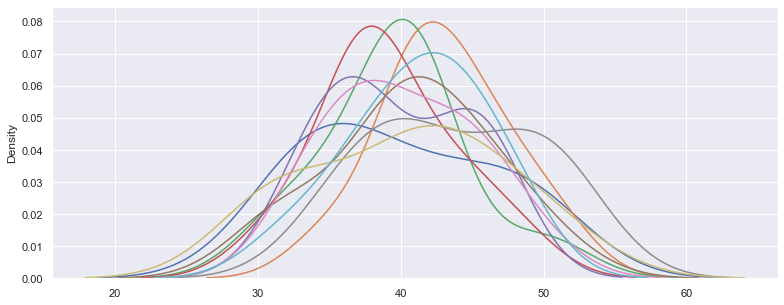

In [11]:
[sns.distplot(s, hist=False) for s in anomalous_mean_mean_avg_degree];

In [26]:
anom_dict = {}
norm_dict = {}

for m in [0.05, 0.1, 0.2, 0.4, 0.8]:
    
    anom_dict[m] = {}
    norm_dict[m] = {}

    for group_size in ['min', 'quartile1', 'median', 'mean', 'random']:
        normal_mean_mean_avg_degree, anomalous_mean_mean_avg_degree = _get_p_m_size_groups_networks_norm_anom_mean_mean_avg_degree(p,m,group_size,anom_comm_names)
        anom_dict[m][group_size] = anomalous_mean_mean_avg_degree
        norm_dict[m][group_size] = normal_mean_mean_avg_degree

        print(f'P {p:.2f}, M {m:.2f}, Group size {group_size}:')
        print(f'\tNormal_mean_mean_avg_degree: {normal_mean_mean_avg_degree:.2f}, Anomalous_mean_mean_avg_degree: {anomalous_mean_mean_avg_degree:.2f}');
        

P 0.40, M 0.05, Group size min:
	Normal_mean_mean_avg_degree: 2.88, Anomalous_mean_mean_avg_degree: 1.99
P 0.40, M 0.05, Group size quartile1:
	Normal_mean_mean_avg_degree: 2.87, Anomalous_mean_mean_avg_degree: 5.40
P 0.40, M 0.05, Group size median:
	Normal_mean_mean_avg_degree: 2.86, Anomalous_mean_mean_avg_degree: 14.77
P 0.40, M 0.05, Group size mean:
	Normal_mean_mean_avg_degree: 2.86, Anomalous_mean_mean_avg_degree: 22.12
P 0.40, M 0.05, Group size random:
	Normal_mean_mean_avg_degree: 2.85, Anomalous_mean_mean_avg_degree: 25.65
P 0.40, M 0.10, Group size min:
	Normal_mean_mean_avg_degree: 2.88, Anomalous_mean_mean_avg_degree: 4.01
P 0.40, M 0.10, Group size quartile1:
	Normal_mean_mean_avg_degree: 2.87, Anomalous_mean_mean_avg_degree: 10.84
P 0.40, M 0.10, Group size median:
	Normal_mean_mean_avg_degree: 2.86, Anomalous_mean_mean_avg_degree: 29.56
P 0.40, M 0.10, Group size mean:
	Normal_mean_mean_avg_degree: 2.86, Anomalous_mean_mean_avg_degree: 44.25
P 0.40, M 0.10, Group size

##### P changes is Negligible  for avg_degree

In [27]:
df = pd.DataFrame.from_dict(anom_dict)
df.index = pd.Categorical(df.index, categories = ['min', 'quartile1', 'median', 'mean', 'random'])
df = df.sort_index()
df

,0.05,0.1,0.2,0.4,0.8
min,1.992909,4.012338,8.083142,15.910183,31.849366
quartile1,5.402242,10.842760,21.813894,43.454236,86.939772
median,14.771323,29.563665,59.068735,117.889654,236.071251
mean,22.122654,44.252037,88.499302,177.101262,354.247296
random,25.652075,51.261503,102.493158,205.060775,410.103893


In [28]:
df = pd.DataFrame.from_dict(norm_dict)
df.index = pd.Categorical(df.index, categories = ['min', 'quartile1', 'median', 'mean', 'random'])
df = df.sort_index()
df

,0.05,0.1,0.2,0.4,0.8
min,2.878551,2.878568,2.878622,2.878682,2.878923
quartile1,2.874213,2.874470,2.874816,2.875430,2.876885
median,2.860489,2.861881,2.864187,2.869293,2.879379
mean,2.856008,2.858742,2.863823,2.874857,2.895974
random,2.850210,2.856394,2.868877,2.893149,2.941864
